# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results_complete = pd.merge(study_results,mouse_metadata, how='left',on=['Mouse ID','Mouse ID'])

# Display the data table for preview
#sorted_results=study_results_complete.sort_values(by='Timepoint')
study_results_complete.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
study_results_complete["Mouse ID"].nunique()



249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=study_results_complete[study_results_complete.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicates



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
study_results_complete.loc[study_results_complete["Mouse ID"]=='g989']



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_clean = study_results_complete[study_results_complete["Mouse ID"] != 'g989']


In [6]:
# Checking the number of mice in the clean DataFrame.
study_results_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
per_drug_mean = study_results_clean.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
per_drug_median = study_results_clean.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
per_drug_variance = study_results_clean.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
per_drug_std_dev =study_results_clean.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
per_drug_mean_std_err =  study_results_clean.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
# Assemble the resulting series into a single summary DataFrame.
summary ={
    'Mean Tumor Volume': per_drug_mean,
    'Median Tumor Volume':per_drug_median,
    'Tumor Volume Variance':per_drug_variance,
    'Tumor Volume Std. Dev.':per_drug_std_dev,
    'Tumor Volume Std. Err.':per_drug_mean_std_err

}
drug_summary = pd.DataFrame(summary)
drug_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
result = study_results_clean.groupby("Drug Regimen")['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
study_results_clean["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

## Bar and Pie Charts

[Text(0, 0.5, 'Number of Mice Tested')]

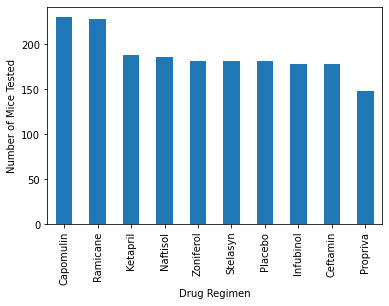

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

panda_barplotdf = study_results_clean.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
#panda_barplot.sort_values(ascending=False)
panda_barplot=panda_barplotdf.plot(kind='bar')
panda_barplot.set(ylabel='Number of Mice Tested')







Text(0, 0.5, 'Number of Mice Tested')

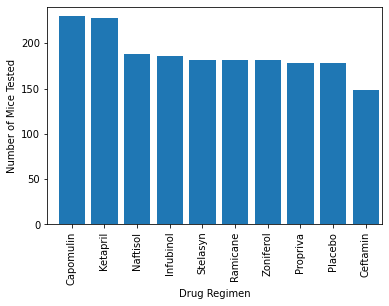

In [82]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

number_tested = study_results_clean.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
drugs= study_results_clean["Drug Regimen"].unique()
plt.bar(range(len(drugs)),number_tested)
plt.xlim(-0.75,9.5)
plt.ylim(0, max(number_tested)+10)
plt.xticks(range(len(drugs)),drugs ,rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
#['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']


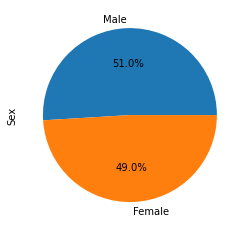

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = study_results_clean['Sex'].value_counts()
#gender_count_total=study_results_clean['Sex'].count()
panda_pie=gender_count.plot.pie(autopct='%1.1f%%')
#percent = gender_count / gender_count_total
panda_pie




([<matplotlib.patches.Wedge at 0x141afc49dc8>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

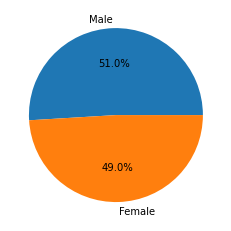

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = study_results_clean.sort_values(by=['Sex'],ascending=False)['Sex'].unique()
#male=gender_count.value_counts()
plt.pie(gender_count,labels=pie_labels,autopct='%1.1f%%')
#pie_labels
#gender_count





## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

